In [85]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns



In [86]:
df=pd.read_csv('./Life expectancy.csv')
df.drop(['Country'],axis=1,inplace=True)

In [87]:
df.head()

,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
0,Developing,263,62.0,65.0,1154,19.1,NaN,6,65,0.1,584.259210,33736494,17.2,17.3,0.479,NaN,65.0
1,Developing,8,0.0,98.0,0,57.2,NaN,98,98,0.1,4575.763787,288914,1.2,1.3,0.761,14.2,77.5
2,Developing,19,21.0,95.0,63,59.5,NaN,95,95,0.1,4132.762920,39871528,6.0,5.8,0.743,14.4,75.6
3,Developing,335,66.0,64.0,118,23.3,NaN,7,64,1.9,3695.793748,2785935,8.3,8.2,0.531,11.4,52.4
4,Developing,116,8.0,94.0,0,62.8,NaN,93,94,0.1,13467.123600,43417765,1.0,0.9,0.826,17.3,76.3


In [88]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Adult_Mortality,124.0,1.604758e+02,1.017945e+02,3.000000,73.500000,1.395000e+02,2.340000e+02,4.380000e+02
Infant_Deaths,110.0,2.854545e+01,1.001563e+02,0.000000,0.000000,4.000000e+00,1.975000e+01,9.100000e+02
Hepatitis,119.0,8.759664e+01,2.457859e+01,6.000000,85.000000,9.400000e+01,9.750000e+01,1.980000e+02
Measles,124.0,2.841637e+03,1.151759e+04,0.000000,0.750000,3.700000e+01,5.887500e+02,9.038700e+04
BMI,124.0,4.173387e+01,2.118638e+01,2.100000,20.950000,5.410000e+01,5.975000e+01,7.140000e+01
Underfive_Deaths,119.0,4.395798e+01,1.587556e+02,0.000000,1.000000,7.000000e+00,2.350000e+01,1.110000e+03
Polio,124.0,8.663710e+01,2.165334e+01,6.000000,88.000000,9.500000e+01,9.800000e+01,9.900000e+01
Diphtheria,124.0,8.791935e+01,1.912288e+01,6.000000,89.000000,9.500000e+01,9.800000e+01,9.900000e+01
HIV,124.0,8.193548e-01,1.764127e+00,0.100000,0.100000,1.000000e-01,4.000000e-01,8.100000e+00
GDP,124.0,6.866817e+03,1.088524e+04,5.668726,639.799727,2.728292e+03,8.437563e+03,5.655439e+04


### Finding Missing Values

In [89]:
def find_missing_values():
    percentage_missing=pd.Series(round((df.isnull().sum()/df.shape[0])*100,2),name='percentage of missing lines')
    total_missing=pd.Series(df.isnull().sum(),name='Total Missing Lines')
    missing_values=pd.concat([total_missing,percentage_missing],axis=1)
    missing_values.rename({0:'Total Missing Data Points',1:'Percentage of Missing Data points'},inplace=True)
    return missing_values[missing_values['Total Missing Lines'] !=0]

In [90]:
find_missing_values()

,Total Missing Lines,percentage of missing lines
Infant_Deaths,14,11.29
Hepatitis,5,4.03
Underfive_Deaths,5,4.03
Income_Index,3,2.42
Schooling,5,4.03


### Missing Value Impotation: Mean

In [91]:
MissingValue_Features = ['Infant_Deaths', 'Hepatitis ', 'Underfive_Deaths ', 'Income_Index','Schooling']
for feature in MissingValue_Features:
    df[feature].fillna(np.mean(df[feature]),inplace=True)

In [92]:
find_missing_values()

,Total Missing Lines,percentage of missing lines


<Axes: xlabel='Expected', ylabel='GDP'>

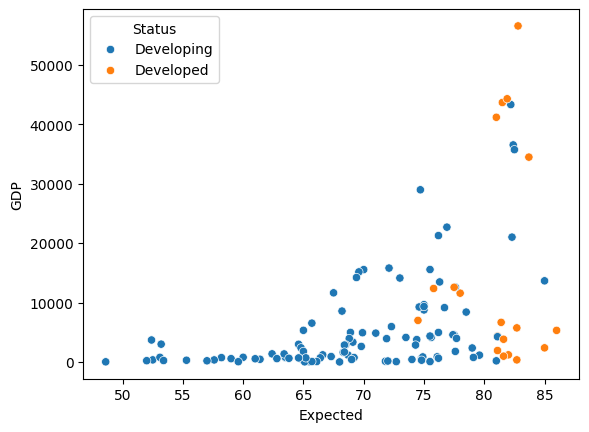

In [98]:
sns.scatterplot(data=df,x='Expected',y='GDP',hue='Status')

<b>Inferences:</b>
1. All the Developed countries are having more life expectancy
2. Countries with less than average GDP are having less life expectancy

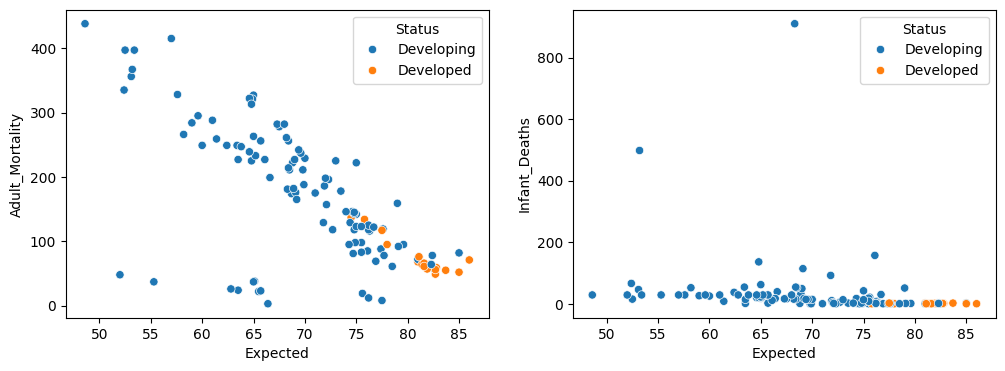

In [114]:
fig,axes=plt.subplots(1,2,figsize=(12,4))
sns.scatterplot(data=df,x='Expected',y='Adult_Mortality',hue='Status',ax=axes[0])
sns.scatterplot(data=df,x='Expected',y='Infant_Deaths',hue='Status',ax=axes[1])
plt.show()

<b>Inferences:</b>
1. The more of adult mortalities resulting in less life expectancy
2. Adult mortality rate is less than average in the Developed countries

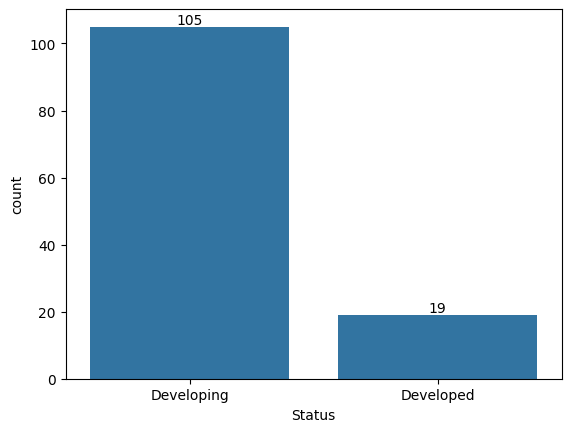

In [99]:
ax=sns.countplot(data=df,x='Status',stat='count')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

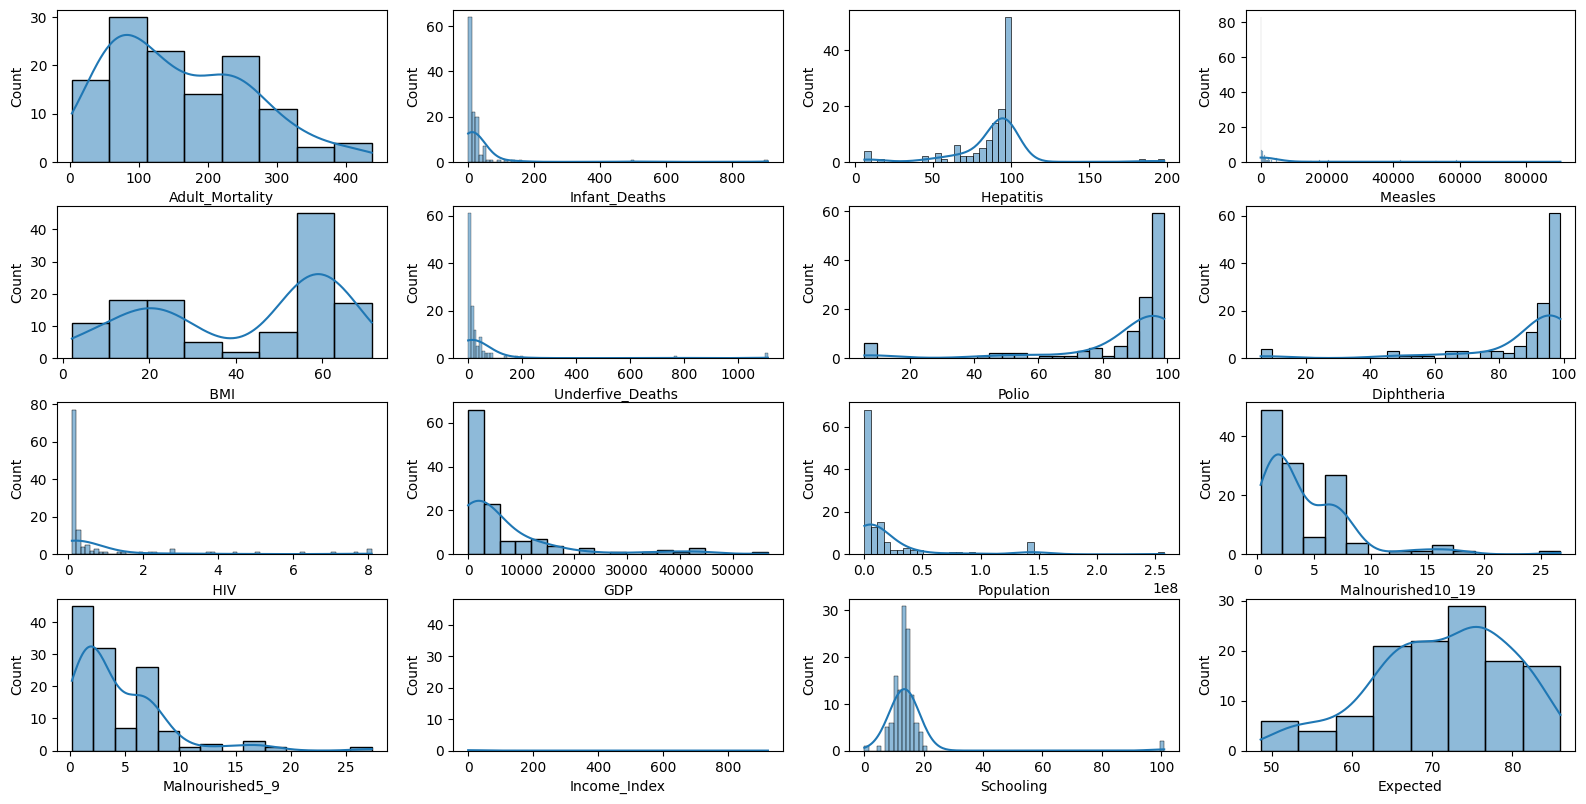

In [138]:
fig,axes=plt.subplots(4,4,figsize=(16,8))
plt.tight_layout()
features=df.columns.to_list()[1:]
# features=['Adult_Mortality', 'Infant_Deaths','Hepatitis ','Measles ']
total_features=len(features)
i=0
for r in range(4):
    for c in range(4):
        if i < total_features:
            # print(r,c,features[i])
            sns.histplot(data=df,x=features[i],kde=True,ax=axes[r,c])
            i+=1